<img alt=EOmaps src=EOmaps_logo.png width=17% align="left" style="margin:0 3em 0 0">

# <b>GeoPython 2023 Workshop</b>

-----

<img src=TU_geo_logo.png width=6% align="right"/>

> **Raphael Quast**  
> TU Wien - Department of Geodesy and Geoinformation - Research Area Remote Sensing  


----

# 🦠 ... before we start... 

##  🡇 Clone (or download) workshop contents form the GitHub repo

- https://github.com/raphaelquast/EOmaps_GeoPython2023


------

❗ If you **can't (or don't want to) install** EOmaps, there is a link to a
**MyBinder instance** on the GitHub page that provides you with a VM you can use
in your browser!

- Resources are limited... please install locally if possible!
- Starting the VM might take a few minutes depending on resource- and docker-image availability.
- "big data" visualizations will most likely not work since the VM has very limited ram/cpu

------

## 🟊 Setup and Install

First, **install miniconda** if you don't have a working `conda` installation

- Download an appropriate `miniconda` installer from here:   
  https://docs.conda.io/en/latest/miniconda.html  
  and follow the instractions.


### Setup the environment (using a `yml` file)

1. **Install mamba** to speed up the installation process  
  `conda install -c conda-forge mamba --yes`
  
2. **Create a new environment** and install all dependencies using the `.yml` file:  
    `mamba create -f "workshop_env.yml"`
    
3. **Activate the environment** using 
   ``activate eomaps_workshop``

4. Navigate to the `EOmaps_workshop` folder and type ``spyder`` to start the **Spyder IDE**

</br>

<hr style="border:3px solid">

<details><summary><b>◔ [click] to show step-by-step instructions</b> (e.g. manual install without using the <code>.yml</code> file)</summary>
    
1. **Create a new environment** and install `mamba` to speed up subsequent installations  
  `conda create -n eomaps_workshop -c conda-forge python=3.9 mamba --yes`
  
2. **Activate the environment**:  
  `activate eomaps_workshop`
  
3. **Install required packages**  
  `mamba install -c conda-forge eomaps netcdf4 rioxarray --yes`
  
4. (optional) install the **Spyder IDE**  
  `mamba install -c conda-forge spyder pyzmq=24.0.1 ipython=7.33 --yes`  
  <font size="1">  (using `pyzmq=24.0.1` and `ipython=7.33` avoids autocompletion issues with the latest versions)</font>
  
5. (optional) install **Jupyter Lab** (and ipympl for interactive inline-plots)  
  `mamba install -c conda-forge jupyterlab ipympl --yes`  
  
5. Wait for all commands to complete and then type `spyder` and hit enter to start the editor.

    
----


> **... or if you prefer to do all in 1 line** (requires `mamba` installed in the base-env):  
> `mamba create -n eomaps_workshop -c conda-forge python=3.9 mamba eomaps netcdf4 rioxarray spyder pyzmq=24.0.1 ipython=7.33 --yes`

</details>

<hr style="border:3px solid">

# 🌑 Getting started with EOmaps

<!---
### Why EOmaps?

- whats the difference to `cartopy`?
  - `cartopy` is nice to create static maps but lacks interactivity
  - `EOmaps` adds another layer on top of `cartopy` to support interactivity
<br><br>

- Many other packages exist that support interactivity out of the box... why create a new one?  
  (`plotly-geo`, `geoviews`, `folium`, `earthpy`, `geemap`, `leafmap` ...)

  - they are almost all just wrappers for javascript (e.g. `leaflet`) or `google-earth-engine`  
    and focused for use in browsers. 
  
  - `EOmaps` is based on `matplotlib/cartopy` and focuses on "offline" usage...   
    (but supports WebMaps and features from NaturalEarth etc.)
    - highly customizable 
    - easy interface
    - python.

--->
  

<div style="display: inline-block">
<hr style="border:1px solid black" align="left">

> **❗ Make sure to have a look at the extensive [📖 Documentation](https://eomaps.readthedocs.io/en/latest/?badge=latest) with a lot of examples (incl. source-code) ❗**

<hr style="border:1px solid black" align="left">
</div>

<hr style="border:3px solid black">

In [1]:
# Select an appropriate matplotlib backend 

# for interactive figures inside the jupyter notebook (only partially supported) use
# %matplotlib widget

# for interactive PyQt5 popup-plots (and optional static snapshots inside the jupyter notebook) use
# %matplotlib qt

# for static snapshots inside the jupyter notebook use
%matplotlib inline

In [2]:
from eomaps import Maps
import numpy as np
import pandas as pd

D:\python_modules\eomaps\eomaps\eomaps.py:156: UserWarning: EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') for the backend module://matplotlib_inline.backend_inline.
Call `m.snapshot()` to print a static snapshot of the map to a Jupyter Notebook cell (or an IPython console)!
  warnings.warn(


# 🌒 Basics - Lets create a map!

EOmaps is all about `Maps` objects.  
To create a new map, initialize a `Maps` object.  
To add features to the map, simply execute the associated methods on the created instance.

EOmaps provides many (highly customizable) features that can be added to the map:
- **North-Arrows**
- **Scalebars**
- **Gridlines**
- A interface for features from [NaturalEarth](https://www.naturalearthdata.com/)
- A interface to many open-access **WebMap Services**
- Functionalities to add **Annotations**, **Markers**, **Lines**, **Logos** etc.
- ...

In [3]:
# %load scripts/1_A_Simple_Map.py
"""   EOmaps GeoPython 2023          ( https://github.com/raphaelquast/EOmaps )

# The basics of EOmaps

- Map projections
- Features from NaturalEarth (https://www.naturalearthdata.com/)
- Gridlines, North-Arrows, Scalebars, Logos
"""

from eomaps import Maps

m = Maps(crs=4326, figsize=(8, 4))
m.set_extent((-50, 50, -20, 20))

m.add_feature.preset.coastline()
m.add_feature.preset.ocean()

m.add_feature.cultural.admin_0_countries(scale=50, zorder=10,
                                         fc="#c2c9a2", lw=0.5, ec="k")

m.add_gridlines(5, c=".5")

m.add_compass(pos=(.105, .76), scale=12, style="north arrow")

s = m.add_scalebar(
    auto_position=(0.68, 0.25),
    autoscale_fraction=0.45,
    patch_props=dict(fc="#d8dace", ec="none", alpha=0.75))

m.add_logo()


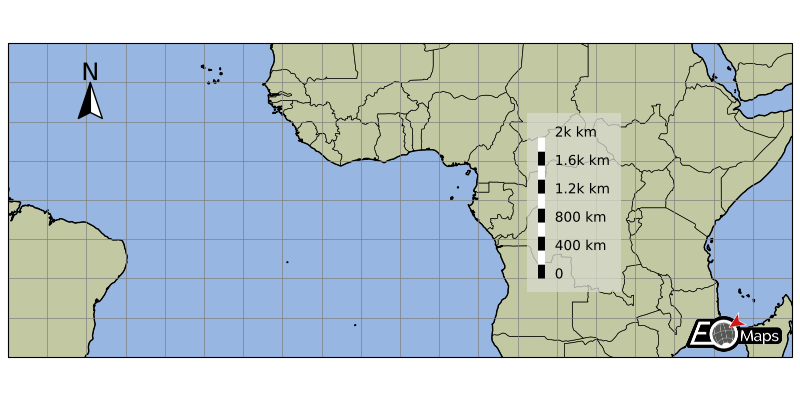

In [4]:
m.snapshot()

# 🌔 Compare and combine - Layer management

Every `Maps` object is associated with a layer on the map (the assigned layer is accessible via `m.layer`)  
A map can have multiple layers and each layer can have multiple `Maps` objects.


- To **create a new layer** on a map, use `m2 = m.new_layer(...)`

  - If no explicit layer-name is provided, the new `Maps` object will use the same layer as the initial one!
  
- To **show** a specific layer or **transparently overlay** multiple layers use `m.show_layer(...)`

In [5]:
# %load scripts/2_Layer_management_and_WebMaps.py
"""   EOmaps GeoPython 2023          ( https://github.com/raphaelquast/EOmaps )

# Layer-management ... compare and combine plot-layers!

- Initialize new layers
- (transparently) overlay multiple layers
- Compare layers - "peek-layer" callbacks
- A first look at the "companion-widget"            >>> Keyboard Shortcut:  "w"
"""

from eomaps import Maps

m = Maps(figsize=(3, 1))
m.add_feature.preset.coastline()

m1 = m.new_layer("land")
m1.add_feature.preset.land()

m1_1 = m1.new_layer()   # A Maps-object on the same layer as m1
m1_1.add_marker(xy=(23, 25), radius=60, ec="k", fc="red", permanent=True)


m2 = m.new_layer("ocean")
m2.add_feature.preset.ocean()
m2.add_marker(xy=(-50, -30), radius=20, ec="k", fc="#58419c", permanent=True)

m.show_layer("land")                           # show an individual layer
m.show_layer("ocean", "land", "base")          # overlay multiple layers
m.show_layer("ocean", ("land", 0.5), "base")   # transparent overlays

# adding WebMap layers
m.add_wms.OpenStreetMap.add_layer.stamen_toner(layer="OSM_WMS")

first layer


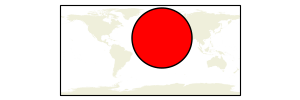

second layer


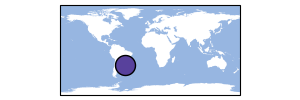

overlay of second layer on top of first


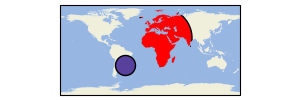

overlay of first layer on top of second


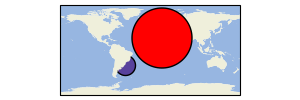

semi-transparent overlay of second layer on top of first


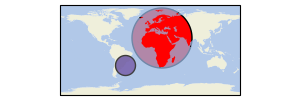

semi-transparent overlay of first layer on top of second


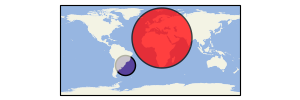

semi-transparent overlay of first layer on top of second
EOmaps: ... adding wms-layer OSM_stamen_toner


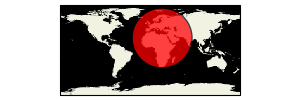

In [6]:
# -----------------------------
print("first layer")
m.snapshot(m1.layer, transparent=True)

print("second layer")
m.snapshot(m2.layer, transparent=True)

print("overlay of second layer on top of first")
m.snapshot(m1.layer, m2.layer, transparent=True)

print("overlay of first layer on top of second")
m.snapshot(m2.layer, m1.layer, transparent=True)

print("semi-transparent overlay of second layer on top of first")
m.snapshot(m1.layer, (m2.layer, .75), transparent=True)

print("semi-transparent overlay of first layer on top of second")
m.snapshot(m2.layer, (m1.layer, .75), transparent=True)

print("semi-transparent overlay of first layer on top of second")
m.snapshot("OSM_WMS", (m1.layer, .75), transparent=True)


# 🌓 A map never comes alone... Multiple maps in one figure

- To **add additional maps** to a figure, use `m2 = m.new_map(...)`  
  (or `m2 = Maps(f=m.f, ...)` if EOmaps-version < v6.1)
- To **create inset-maps** that highlight specific areas on the map, use `m.new_inset_map()`

In [7]:
# %load scripts/3_Multiple_maps_in_one_figure.py
"""   EOmaps GeoPython 2023          ( https://github.com/raphaelquast/EOmaps )

Dealing with multiple maps and/or plots in a single figure.

- Adding new maps/axes to the figure
- InsetMaps
- Re-positioning of axes
- Using the Layout Editor                     >>> Keyboard Shortcut:  "alt + l"

"""

from eomaps import Maps

m = Maps(ax=321)
m.add_feature.preset.coastline()

m1 = m.new_map(ax=322)
m1.add_feature.preset.countries(zorder=0)

m2 = m.new_map(ax=323, crs=Maps.CRS.Mollweide())
m2.add_feature.physical.land(fc="#97c1aa")

m3 = m.new_map(ax=324, crs=Maps.CRS.InterruptedGoodeHomolosine())
m3.add_feature.preset.ocean()

m5 = m.new_map(ax=325, crs=Maps.CRS.Orthographic(-60, -20), keep_on_top=True)
m5.add_feature.preset.ocean()
m5.add_feature.physical.land(fc="darkgreen", ec="none")


# --- create an InsetMap
m2i = m2.new_inset_map(xy=(-60, -15), radius=(35, 50),
                       inset_crs=Maps.CRS.Stereographic(), shape="rectangles",
                       plot_position=(.85, .8), plot_size=0.35,
                       indicate_extent=False)
m2i.add_feature.physical.ocean(fc="lightblue")
m2i.add_feature.physical.land(fc="g", ec="k")
gl = m2i.add_gridlines(lw=0.25)

for i in (m, m1, m2, m3, m5):
    m2i.indicate_inset_extent(i, fc=(1, 0, 0, 0.25))


# --- create an ordinary axes
ax = m.f.add_subplot(326, zorder=100)
ax.scatter(range(10), range(10), c=range(10))

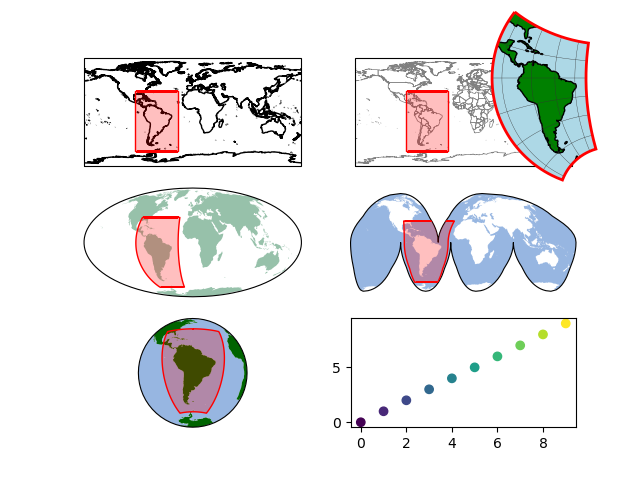

In [8]:
m.snapshot()

# 🌕 Data Visualization

EOmaps aims to make visualization of geographical datasets as simple as possible.

To plot a dataset, execute the following steps:


0. (optional) set the extent of the map via `m.set_extent()`
1. **Assign the data** to a `Maps`-object via `m.set_data(...)`
2. (optional) **set a classification-scheme** via `m.set_classify.<SCHEME>(...)`
3. (optional) **select a shape** to represent the data via `m.set_shape.<SHAPE>(...)`
4. **Plot the data** by calling `m.plot_map(...)`

In [9]:
from eomaps import Maps
import numpy as np

# functions to create random datasets
def data1D(s=500):
    lon = np.random.randint(-150, 150, s)
    lat = np.random.randint(-75, 68, s)
    data = np.random.randint(0, 100, s)
    return dict(data=data, x=lon, y=lat)

def data2D(sx=40, sy=30):
    lon, lat = np.linspace(-160, 50, sx), np.linspace(-70, 80, sy)
    lon, lat = np.meshgrid(lon, lat)
    data = lon**2 + lat**2 + np.cos(lon)
    return dict(data=data, x=lon, y=lat)

def data1D2D(sx=20, sy=30):
    lon = np.linspace(-150,150, sx)
    lat = np.linspace(-75, 68, sy)
    data = np.random.randint(0, 10000, (lon.size, lat.size))
    return dict(data=data, x=lon, y=lat)


m = Maps(ax=221, figsize=(8, 6))
m.add_feature.physical.coastline(fc="none", ec="w", lw=0.5)

# -------------------------------- first map 
m1 = m.new_layer()
m1.set_data(**data1D())
m1.set_classify.EqualInterval(k=5)
m1.set_shape.voronoi_diagram()
m1.plot_map(indicate_masked_points=True)
m1.add_colorbar()

# -------------------------------- second map 
m2 = m.new_map(ax=222)
m2.add_feature.physical.coastline(fc="none", ec="k", lw=0.5)
m2.set_data(**data2D())
m2.set_classify.EqualInterval(k=5)
m2.set_shape.ellipses()
m2.plot_map(vmin=100, vmax=35000, cmap="tab20")
cb = m2.add_colorbar()
cb.tick_params(rotation=90)

# -------------------------------- third map 
m3 = m.new_map(ax=223)
m3.add_feature.physical.coastline(fc="none", ec="k", lw=0.5)
m3.add_feature.preset.ocean()

m3.set_data(**data1D2D(100, 100))
m3.set_classify.EqualInterval(k=5)
m3.set_shape.ellipses()
m3.plot_map(set_extent=False, cmap="cividis")
m3.add_colorbar()

# -------------------------------- inset map for third map 
m3i = m3.new_inset_map(xy=(5,45), radius=15e5, shape="geod_circles",
                       inset_crs=3035,
                       plot_position=(.75, .21), plot_size=.38,
                       indicate_extent=dict(lw=2))
m3i.add_feature.preset.land()
m3i.add_feature.preset.ocean()
m3i.add_gridlines(lw=0.25, zorder=0)


m3i.inherit_data(m3)
m3i.inherit_classification(m3)
m3i.set_shape.ellipses(radius=0.5, radius_crs=4326)
m3i.plot_map()
m3i.text(.5,1.05, "Inset Map", transform=m3i.ax.transAxes, fontsize=12)

m.subplots_adjust(left=0.01, right=.99, bottom=0.01, top=.99, hspace=.25)

EOmaps: estimating radius...
EOmaps: radius: 1.5e+00
EOmaps: Warning: some datapoints could not be drawn!
EOmaps: estimating radius...
EOmaps: radius:( 2.6923e+00 , 2.5862e+00 )
EOmaps: estimating radius...
EOmaps: radius: 7.2222e-01


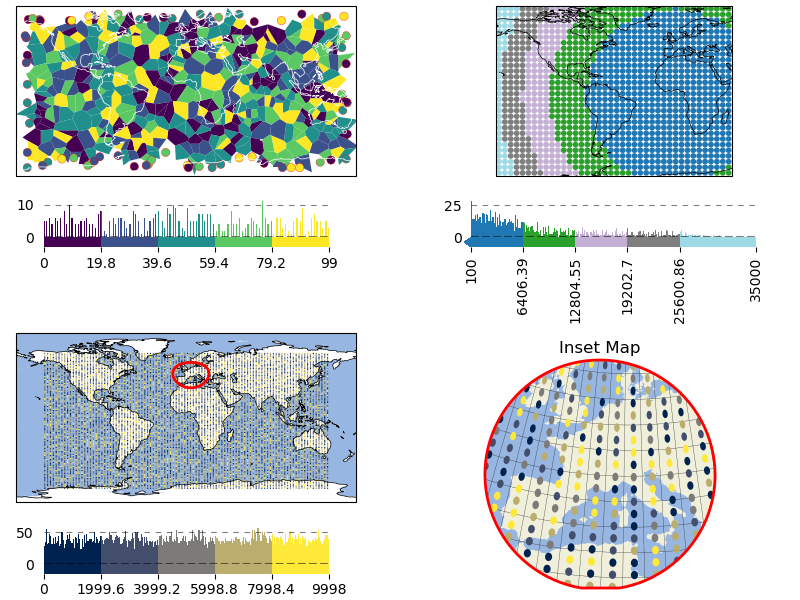

In [10]:
m.snapshot(clear=True)

# 🌍 Interactivity - Using maps for data analysis 

> ❗ Interactive plots require using an interactive matplotlib backend!  
> ❗ Make sure to use `matplotlib qt` to get interactive popup plots!

In [11]:
# %load scripts/5_Interactive_maps.py
"""   EOmaps GeoPython 2023          ( https://github.com/raphaelquast/EOmaps )

Turn your maps into interactive data analysis widgets

- Click / Pick / Keypress callbacks
- Pre-defined callbacks
- Custom callbacks

"""

from eomaps import Maps
import numpy as np

lon = np.linspace(-150,150, 100)
lat = np.linspace(-75, 68, 50)
data = np.random.randint(0, 100, (lon.size, lat.size))
#--------------------------------------------

m = Maps(ax=211)
m.add_feature.preset.coastline()
m.set_data(data, lon, lat)
m.plot_map()

m.cb.click.attach.annotate()
m.cb.click.attach.mark(modifier=1, fc="r", radius=4, radius_crs=4326)
m.cb.click.attach.mark(modifier=2, fc="g", radius=8, radius_crs=4326)
m.cb.click.attach.mark(modifier=3, fc="b", radius=16, radius_crs=4326)


ax = m.f.add_subplot(212)

def cb(ID, pos, val, color="r", markersize=5, **kwargs):
    print("\nA custom callback!")
    print(ID, pos, val)
    l, = ax.plot(*pos, marker="o", c=color, markersize=markersize)
    # m.cb.pick.add_temporary_artist(l)


m.cb.pick.attach(cb, button=3)
m.cb.click.attach(cb, button=1, color="b", markersize=2)


m.cb.pick.attach.mark(button=3, fc="none", ec="r", buffer=4)
m.cb.pick.attach.annotate(button=3,
                          text = lambda val, **kwargs: f"the value is {val:.2f}"
                          )



EOmaps: estimating radius...
EOmaps: radius:( 1.5152e+00 , 1.4592e+00 )


'annotate_0__base__single__3__None'

![](interactive.gif)

# Data Visualization continued... RGB composites

In [12]:
# %load scripts/6_Data_visualization_rgb.py
from eomaps import Maps

path = r"datasets/BlueMarbleNG-TB_2004-12-01_rgb_360x180.TIFF"
path_fine = r"datasets/BlueMarbleNG-TB_2004-12-01_rgb_3600x1800.TIFF"



band_data = [Maps.read_file.GeoTIFF(path, sel=dict(band=b)) for b in (1, 2, 3)]
rgb = [d["data"] / 255 for d in band_data]

m = Maps(3035)
#m.set_extent_to_location("europe")
m.set_data(**band_data[0])
m.set_shape.raster()
m.plot_map(fc=rgb)
m.add_gridlines(c="k")



band_data_fine = [
    Maps.read_file.GeoTIFF(path_fine, sel=dict(band=b)) for b in (1, 2, 3)]
rgb_coarse = [d["data"] / 255 for d in band_data_fine]

m2 = m.new_layer("fine")
m2.set_data(**band_data_fine[0])
m2.set_shape.raster()
m2.plot_map(fc=rgb_coarse)
m2.add_gridlines(c="k")



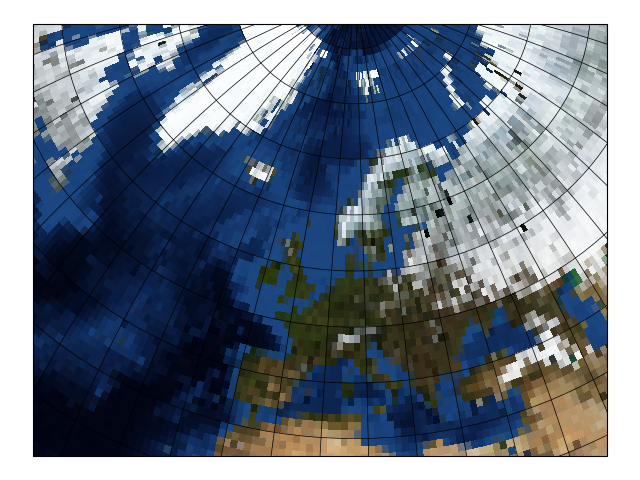

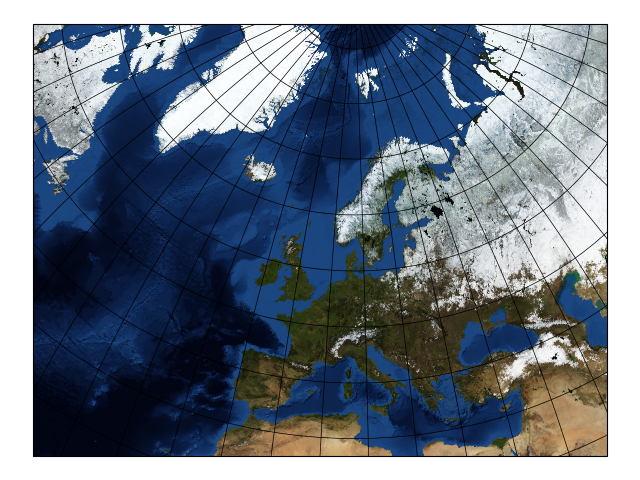

In [13]:
m.snapshot()
m.snapshot("fine")

## Dealing with large datasets

> If you are only interested in an area that contains a subset of the data, make sure to call `m.set_extent(...)` **before** plotting the data!  
> This way, only the visible subset of the data is plotted which can result in a tremendous speedup!


- If the data is 2D, the `raster` shape is capable of visualizing large datasets (up to several million datapoints) in reasonable time

----

But my dataset is **extremely large**... what should I do? $\Rightarrow$ **Use data shading!**

Once a certain amount of datapoints is reached, plotting all of them makes little sense...  
(you most probably already reached the limit of dpi on your screen)


> If data-shading is used, a **dynamic aggregation** of the data based on the  
> figure dpi and the visible extent is plotted (via the `datashader` package).  
> ❗❗ **NOTE: This is extremely fast but can result in a very different (and possibly misleading) appearance of the data!!**


- use `m.set_shape.shade_raster()` for 2D data
- use `m.set_shape.shade_points()` for 1D data


In [14]:
# %load scripts/dealing_with_large_datasets.py
from eomaps import Maps
import numpy as np

lon = np.linspace(-150,150, 2000)
lat = np.linspace(-75, 68, 2000)
data = np.random.randint(0, 100, (lon.size, lat.size))
#--------------------------------------------

m = Maps(layer="all", figsize=(6, 3))
m.add_feature.preset.coastline()

m1 = m.new_layer("raster")
m1.set_shape.raster()
m1.set_data(data, lon, lat)
m1.plot_map()
m1.add_colorbar(extend="neither", hist_bins=50)

m2 = m.new_layer("shade_raster")
m2.add_feature.preset.coastline()
m2.inherit_data(m1)
m2.set_shape.shade_raster()
m2.plot_map()
m2.add_colorbar(extend="neither", hist_bins=50, 
                #dynamic_shade_indicator=True
                )

m.util.layer_selector(layers=[m1.layer, m2.layer], ncol=2, fontsize=7)
m.show_layer("raster")


EOmaps: Plotting 4.0E+06 points as raster...
       this might take a few seconds...
EOmaps: Plotting 4.0E+06 points as raster...
       this might take a few seconds...



using 'raster' as plot shape



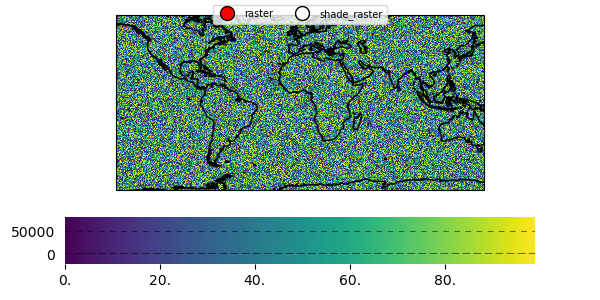


Using 'shade_raster' as plot shape



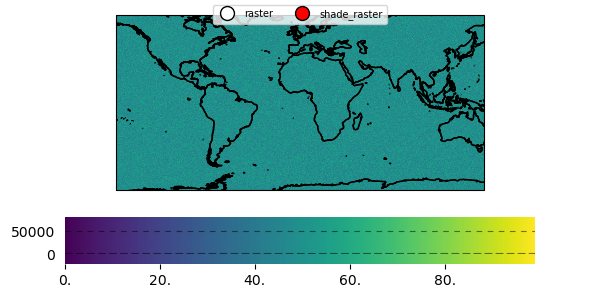

In [15]:
print("\nusing 'raster' as plot shape\n")
m.snapshot("raster")
print("\nUsing 'shade_raster' as plot shape\n")
m.show_layer("shade_raster")
m.snapshot("shade_raster")

### Categorical Raster example

In [ ]:
# %load scripts/dealing_with_large_datasets2.py
# %% Download the data

# =========================================================================
from pathlib import Path
import requests

tilename = "ESA_WorldCover_10m_2020_v100_N45E006_Map.tif"

savepath = Path("datasets") / tilename
if savepath.exists():
    print("file already downloaded")
else:
    print("downloading tile...")

    s3_url_prefix = "https://esa-worldcover.s3.eu-central-1.amazonaws.com"
    url = rf"{s3_url_prefix}/v100/2020/map/{tilename}"
    r = requests.get(url, allow_redirects=True)
    
    with open(savepath, 'wb') as f:
        f.write(r.content)
        
# =========================================================================

# %% Create a map
from pathlib import Path
from eomaps import Maps

path = "datasets/ESA_WorldCover_10m_2020_v100_N45E006_Map.tif"

m = Maps.from_file.GeoTIFF(
    path,
    layer="raster",
    extent = "Muttenz",
    shape="raster",
    alpha=0.8,
    )
m.add_gridlines()

for i, r in enumerate([10, 50, 100, 200, 500, 1000, 2000]):
    m.add_marker(xy=(7.6416665, 47.5350134), xy_crs=4326, 
                 radius=r, shape="geod_circles", 
                 fc="none", ec="k", lw=(i+1)/3)

m.add_annotation(xy=(7.6416665, 47.5350134), xy_crs=4326, text="GeoPython\n2023",
                 xytext=(120,40),
                 horizontalalignment="center",
                 arrowprops=dict(arrowstyle="fancy", fc="k", ec=".5", mutation_scale=30),
                 bbox=dict(boxstyle='circle,pad=0.5', fc='.5')
                )
m.add_logo()

# %% fetch a custom WebMap service and add some layers to the map
url = r"https://ch-osm-services.geodatasolutions.ch/geoserver/ows?service=wms&version=1.3.0&request=GetCapabilities&srsName=EPSG:2056"
wms = m.add_wms.get_service(url)

wms.add_layer.magosm_tram_ltr_routes_line(layer="tram", transparent=True)
wms.add_layer.magosm_railways_line(layer="rail", transparent=True)
wms.add_layer.magosm_hiking_foot_routes_line(layer="hike", transparent=True)

m.show_layer(m.layer, "tram", "rail", "hike")

downloading tile...
Querying Muttenz
Centering Map to:
     Muttenz, Bezirk Arlesheim, Basel-Landschaft, 4132, Schweiz/Suisse/Svizzera/Svizra
EOmaps: ... adding wms-layer magosm:tram_ltr_routes_line
EOmaps: ... adding wms-layer magosm:railways_line
EOmaps: ... adding wms-layer magosm:hiking_foot_routes_line


In [ ]:
m.snapshot()

## Working with GeoDataFrames

In [ ]:
# %load scripts/working_with_geodataframes.py
from eomaps import Maps
import matplotlib.pyplot as plt

use_key = "MAPCOLOR13"

# %% Working with GeoDataFrames

def on_layer_activation(m, gdf, val, color="r"):   
    use_gdf = gdf[gdf[use_key] == val]
    m.add_gdf(use_gdf, fc=color, ec="none")

# create a map
m = Maps(layer="all")
m.add_feature.preset.coastline()

# load a dataframe from NaturalEarth
countries = m.add_feature.cultural.admin_0_countries.get_gdf()
m.add_gdf(countries, fc="none", ec="k")

# select the available (unique) keys
usevals = sorted(countries[use_key].unique())
options = {f"{i}" : (i, plt.cm.colors.rgb2hex(plt.cm.tab20(i))) for i in usevals}

# add the (lazily) initialized layers
for name, (val, c) in options.items():
    mi = m.new_layer(name)
    mi.on_layer_activation(on_layer_activation, gdf=countries, val=val, color=c)

# get a widget to select the layers 
m.util.layer_selector(loc="upper center", 
                      draggable=False,
                      layers=list(options),
                      title=use_key,
                      ncol=5,
                      fontsize=9)

m.subplots_adjust(bottom=0)

# %%  GeoDataFrame picking

cmap = plt.cm.colors.ListedColormap([i[1] for i in options.values()])

m2 = Maps(Maps.CRS.Mollweide())
m2.add_feature.preset.coastline()

m2.add_gdf(countries[countries[use_key] > 0], ec="k", column=use_key,
           cmap="tab20", picker_name="key")

def text(m, ID, val, pos, ind):
    return f"{countries.loc[ID].NAME}\n{use_key} = {val}"

m2.cb.pick__key.attach.annotate(text=text)
m2.cb.pick__key.attach.highlight_geometry(ec="r", lw=2, fc="none")

In [ ]:
m.show_layer("1")
m.snapshot()

m.show_layer("7")
m.snapshot()

#m2.snapshot(transparent=True)

![gdf_picking](gdf_pick.gif)